https://www.youtube.com/watch?v=9MzgIGAWnKE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("archive/chocolate_sales.csv")

In [10]:
df.head(12)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
5,Van Tuxwell,India,Smooth Sliky Salty,06/06/2022,"$5,376.00",38
6,Oby Sorrel,UK,99% Dark & Pure,25/01/2022,"$13,685.00",176
7,Gunar Cockshoot,Australia,After Nines,24/03/2022,"$3,080.00",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20/04/2022,"$3,990.00",59
9,Brien Boise,Australia,99% Dark & Pure,04/07/2022,"$2,835.00",102


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [6]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [8]:
df.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

In [9]:
df.describe()

,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


Date cleaning

In [14]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [18]:
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','').astype('float')

Exploratory data analysis

In [20]:
np.mean(df['Amount'])

np.float64(6030.338775137113)

In [22]:
np.median(df['Boxes Shipped'])

np.float64(137.0)

In [24]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

In [27]:
country_sales.map('{:,.2f}'.format) # thousand separator + 2 decimal places

Country
Australia      3,646,444.35
UK             3,365,388.90
India          3,343,730.83
USA            3,313,858.09
Canada         3,078,495.65
New Zealand    3,043,654.04
Name: Amount, dtype: object

In [31]:
# Top products by total sales
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

In [32]:
top_products.map('{:,.2f}'.format)

Product
Smooth Sliky Salty      1,120,201.09
50% Dark Bites          1,087,659.35
White Choc              1,054,257.00
Peanut Butter Cubes     1,036,591.09
Eclairs                   996,947.96
99% Dark & Pure           960,033.45
85% Dark Bars             955,268.24
Organic Choco Syrup       945,345.73
Spicy Special Slims       938,131.69
Mint Chip Choco           904,989.55
Almond Choco              890,454.65
Manuka Honey Choco        885,208.03
Milk Bars                 866,273.62
Raspberry Choco           845,388.41
After Nines               837,215.67
Fruit & Nut Bars          829,278.96
Orange Choco              824,070.85
Drinking Coco             822,245.57
Baker's Choco Chips       799,085.67
Choco Coated Almonds      773,062.91
Caramel Stuffed Bars      742,516.15
70% Dark Bites            677,346.22
Name: Amount, dtype: object

Matplotib

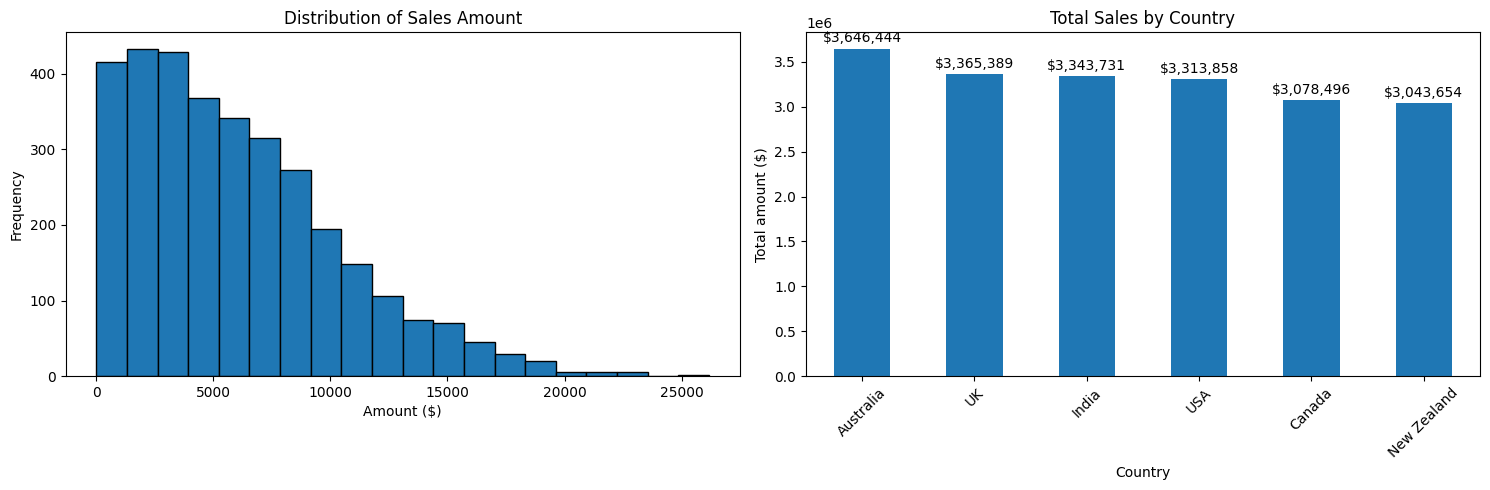

In [36]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=20, edgecolor='black')
plt.title('Distribution of Sales Amount')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
bars = country_sales.plot(kind='bar', ax=plt.gca()) # Get current axes
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total amount ($)')
plt.xticks(rotation=45)

# Add data labels only to bar chart
for i, v in enumerate(country_sales):
    plt.text(i, v + v*0.01, '${:,.0f}'.format(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Seaborn

C:\Users\ksymoniuk\AppData\Local\Temp\ipykernel_24388\222714526.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.barplot(x=amount_sum.values, y=amount_sum.index, ax=axs[1], palette="rocket")


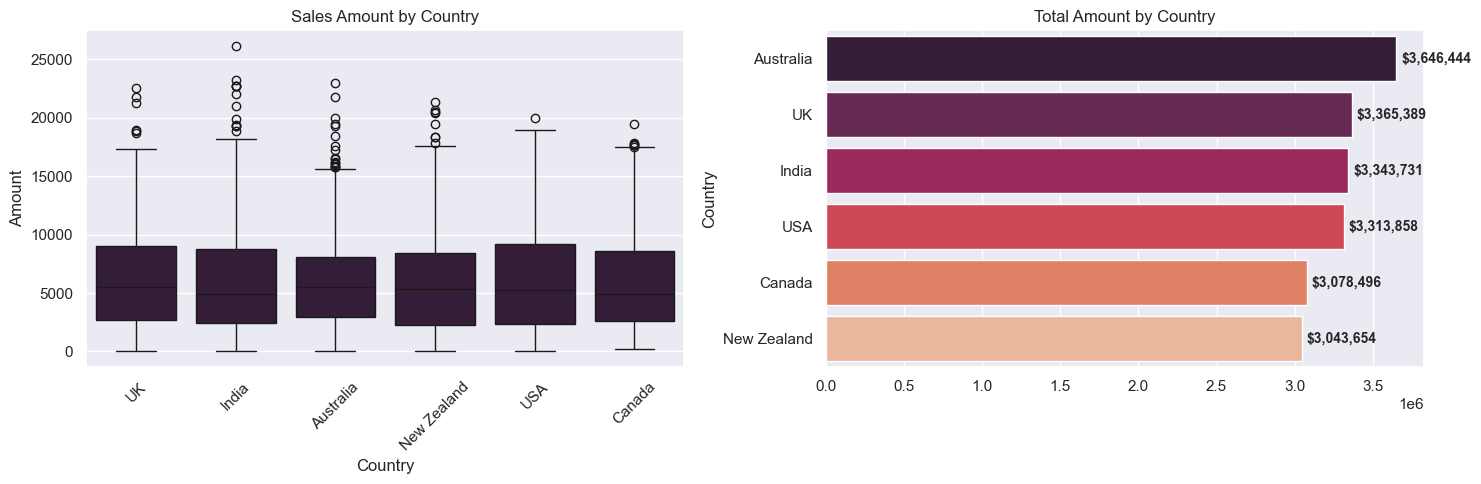

In [42]:
sns.set_theme(
    style="darkgrid",
    palette="rocket",
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='Country', y='Amount', ax=axs[0])
axs[0].set_title('Sales Amount by Country')
axs[0].tick_params(axis='x', rotation=45)

# Total Amount per Country
amount_sum = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
countplot = sns.barplot(x=amount_sum.values, y=amount_sum.index, ax=axs[1], palette="rocket")
axs[1].set_title('Total Amount by Country')

# Label bars with formatted currency
for p in countplot.patches:
    width = p.get_width()
    axs[1].text(width + width*0.01, p.get_y() + p.get_height()/2., f'${width:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()